In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns
import pandas as pd
import imblearn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
Beans = pd.read_excel('DryBeanDataSet.xlsx')
Beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.82765,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.80264,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


In [4]:
Beans.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
Constantness         int64
EquivDiameter      float64
Colour              object
Extent              object
Solidity           float64
roundness          float64
Compactness         object
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
ShapeFactor5       float64
ShapeFactor6        object
Class               object
Sort order         float64
dtype: object

In [5]:
Beans["Colour"] = Beans["Colour"].astype('category')
Beans["Constantness"] = Beans["Constantness"].astype('category')
Beans["Class"] = Beans["Class"].astype('category')
Beans["Extent"] = pd.to_numeric(Beans["Extent"], errors='coerce')
Beans["Compactness"] = pd.to_numeric(Beans["Compactness"], errors='coerce')
Beans["ShapeFactor6"] = pd.to_numeric(Beans["ShapeFactor6"], errors='coerce')

In [6]:
Beans.dtypes

Area                  int64
Perimeter           float64
MajorAxisLength     float64
MinorAxisLength     float64
AspectRation        float64
Eccentricity        float64
ConvexArea            int64
Constantness       category
EquivDiameter       float64
Colour             category
Extent              float64
Solidity            float64
roundness           float64
Compactness         float64
ShapeFactor1        float64
ShapeFactor2        float64
ShapeFactor3        float64
ShapeFactor4        float64
ShapeFactor5        float64
ShapeFactor6        float64
Class              category
Sort order          float64
dtype: object

In [7]:
Beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.827650,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.802640,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


In [8]:
Beans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Sort order
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,1.361100e+04,13605.000000,13611.000000,13611.000000,13593.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13606.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53765.692602,4.762541e+02,0.749747,0.987143,0.873282,0.799886,0.006564,0.001716,0.643590,2.368097,0.995063,89.358603,0.500271
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29778.009358,2.583687e+04,0.049085,0.004660,0.059520,0.061684,0.001128,0.000596,0.098996,0.871619,0.004366,51.838555,0.287926
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,-30.000000,1.614174e-01,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.695579,0.947687,0.000466,0.000089
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,2.150680e+02,0.718641,0.985670,0.832096,0.762577,0.005900,0.001154,0.581359,1.614151,0.993703,45.258826,0.248187
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,2.384380e+02,0.759874,0.988283,0.883157,0.801291,0.006645,0.001694,0.642044,2.368757,0.996386,88.766670,0.503810
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,2.794522e+02,0.786852,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,3.115695,0.997883,134.273148,0.750096
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,3.014441e+06,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,3.966119,0.999733,178.985023,0.999985


In [9]:
Beans.std()

C:\Users\andre\AppData\Local\Temp\ipykernel_12256\3045098025.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Beans.std()


Area               29324.095717
Perimeter            214.289696
MajorAxisLength       85.694186
MinorAxisLength       44.970091
AspectRation           0.246678
Eccentricity           0.092002
ConvexArea         29778.009358
EquivDiameter      25836.865632
Extent                 0.049085
Solidity               0.004660
roundness              0.059520
Compactness            0.061684
ShapeFactor1           0.001128
ShapeFactor2           0.000596
ShapeFactor3           0.098996
ShapeFactor4           0.871619
ShapeFactor5           0.004366
ShapeFactor6          51.838555
Sort order             0.287926
dtype: float64

In [10]:
((Beans.isna().sum())/13611) * 100

Area               0.000000
Perimeter          0.000000
MajorAxisLength    0.000000
MinorAxisLength    0.000000
AspectRation       0.000000
Eccentricity       0.000000
ConvexArea         0.000000
Constantness       0.000000
EquivDiameter      0.000000
Colour             0.000000
Extent             0.044082
Solidity           0.000000
roundness          0.000000
Compactness        0.132246
ShapeFactor1       0.000000
ShapeFactor2       0.000000
ShapeFactor3       0.000000
ShapeFactor4       0.000000
ShapeFactor5       0.000000
ShapeFactor6       0.036735
Class              0.000000
Sort order         0.000000
dtype: float64

In [11]:
(Beans == "?").sum()

Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              6
Extent              0
Solidity            0
roundness           0
Compactness         0
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        0
Class              17
Sort order          0
dtype: int64

In [12]:
Beans.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
Constantness           2
EquivDiameter      12012
Colour                 5
Extent             13529
Solidity           13526
roundness          13543
Compactness        13525
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13611
ShapeFactor5       13543
ShapeFactor6       13606
Class                  8
Sort order         13611
dtype: int64

In [13]:
cat = Beans[["Constantness", "Colour", "Class"]].copy()
cat

,Constantness,Colour,Class
0,1,brown,CALI
1,1,black,DERMASON
2,1,green,SEKER
3,1,brown,BOMBAY
4,1,brown,SIRA
...,...,...,...
13606,1,black,DERMASON
13607,1,brown,BARBUNYA
13608,0,brown,BARBUNYA
13609,1,white,HOROZ


In [14]:
(((cat == "?").sum())/13611) *100

Constantness    0.000000
Colour          0.044082
Class           0.124899
dtype: float64

In [15]:
# Replace '?' with NaN
cat.replace('?', np.nan, inplace=True)

In [16]:
mode = cat.mode()
print(cat["Class"].value_counts())
print(cat["Colour"].value_counts())
print(cat["Constantness"].value_counts())

DERMASON    3542
SIRA        2634
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1317
BOMBAY       521
Name: Class, dtype: int64
brown    6115
black    3541
green    2023
white    1926
Name: Colour, dtype: int64
1    12289
0     1322
Name: Constantness, dtype: int64


In [17]:
print((3542/13611)*100)
print((2634/13611)*100)
print((6115/13611)*100)
print((3541/13611)*100)
print((12289/13611)*100)
print((1322/13611)*100)

26.02306957607817
19.3519947101609
44.92689736242745
26.01572257732716
90.2872676511645
9.712732348835502


# Create Dummy variables and replace the missing values with NaN

In [18]:
Beans["Class"].replace('?', np.nan, inplace=True)
Beans["Colour"].replace('?', np.nan, inplace=True)

In [19]:
Beans = Beans[Beans["Class"].notna()]
# Beans["Colour"].fillna(Beans["Colour"].mode()[0], inplace=True)
# Beans["Extent"].fillna(Beans["Extent"].mean(), inplace=True)
# Beans["Compactness"].fillna(Beans["Compactness"].mean(), inplace=True)
# Beans["ShapeFactor6"].fillna(Beans["ShapeFactor6"].mean(), inplace=True)
# (Beans.isna()).sum()

In [20]:
Beans["Constantness"] = pd.to_numeric(Beans["Constantness"], errors='coerce')
Beans_encoded = pd.get_dummies(Beans.dropna(), columns=['Colour'], dtype=float)
# label = LabelEncoder()
# Beans_encoded["Class"] = label.fit_transform(Beans_encoded["Class"])
# Beans_encoded = Beans_encoded.drop([2762, 3941, 4780])
# print(Beans_encoded.max())
Beans_encoded = Beans_encoded.reset_index(drop=True)
print(Beans_encoded.columns.tolist())
Beans_encoded["EquivDiameter"].idxmin()
Beans_encoded.dtypes

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'Constantness', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6', 'Class', 'Sort order', 'Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white']


Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
Constantness         int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
ShapeFactor5       float64
ShapeFactor6       float64
Class                int32
Sort order         float64
Colour_black       float64
Colour_brown       float64
Colour_green       float64
Colour_white       float64
dtype: object

In [21]:
# Beans['Class'] = Beans['Class'].replace(7, np.nan)
# Beans['Colour'] = Beans['Colour'].replace(4, np.nan)

In [22]:
print(Beans['Class'].value_counts())
print(Beans['Colour'].value_counts())

DERMASON    3542
SIRA        2634
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1317
BOMBAY       521
Name: Class, dtype: int64
brown    6115
black    3541
green    2023
white    1926
Name: Colour, dtype: int64


# Handle imbalanced classes

We can drop sort order from the data, as it has unique values for all of the Beans

In [23]:
# cleaned_beans = Beans.dropna()
# dropped_beans = Beans[Beans.isna().any(axis=1)]
# X = cleaned_beans.drop(["Class","Sort order"], axis=1)
# y = cleaned_beans["Class"]

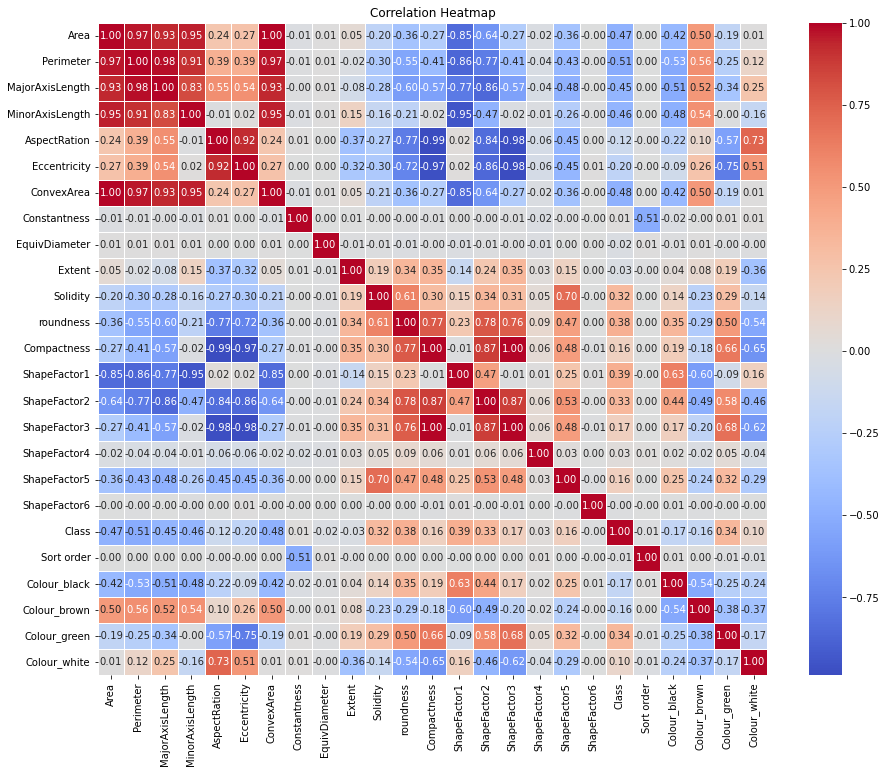

In [24]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap with annotation
sns.heatmap(Beans_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Titles and labels
plt.title('Correlation Heatmap')
plt.show()

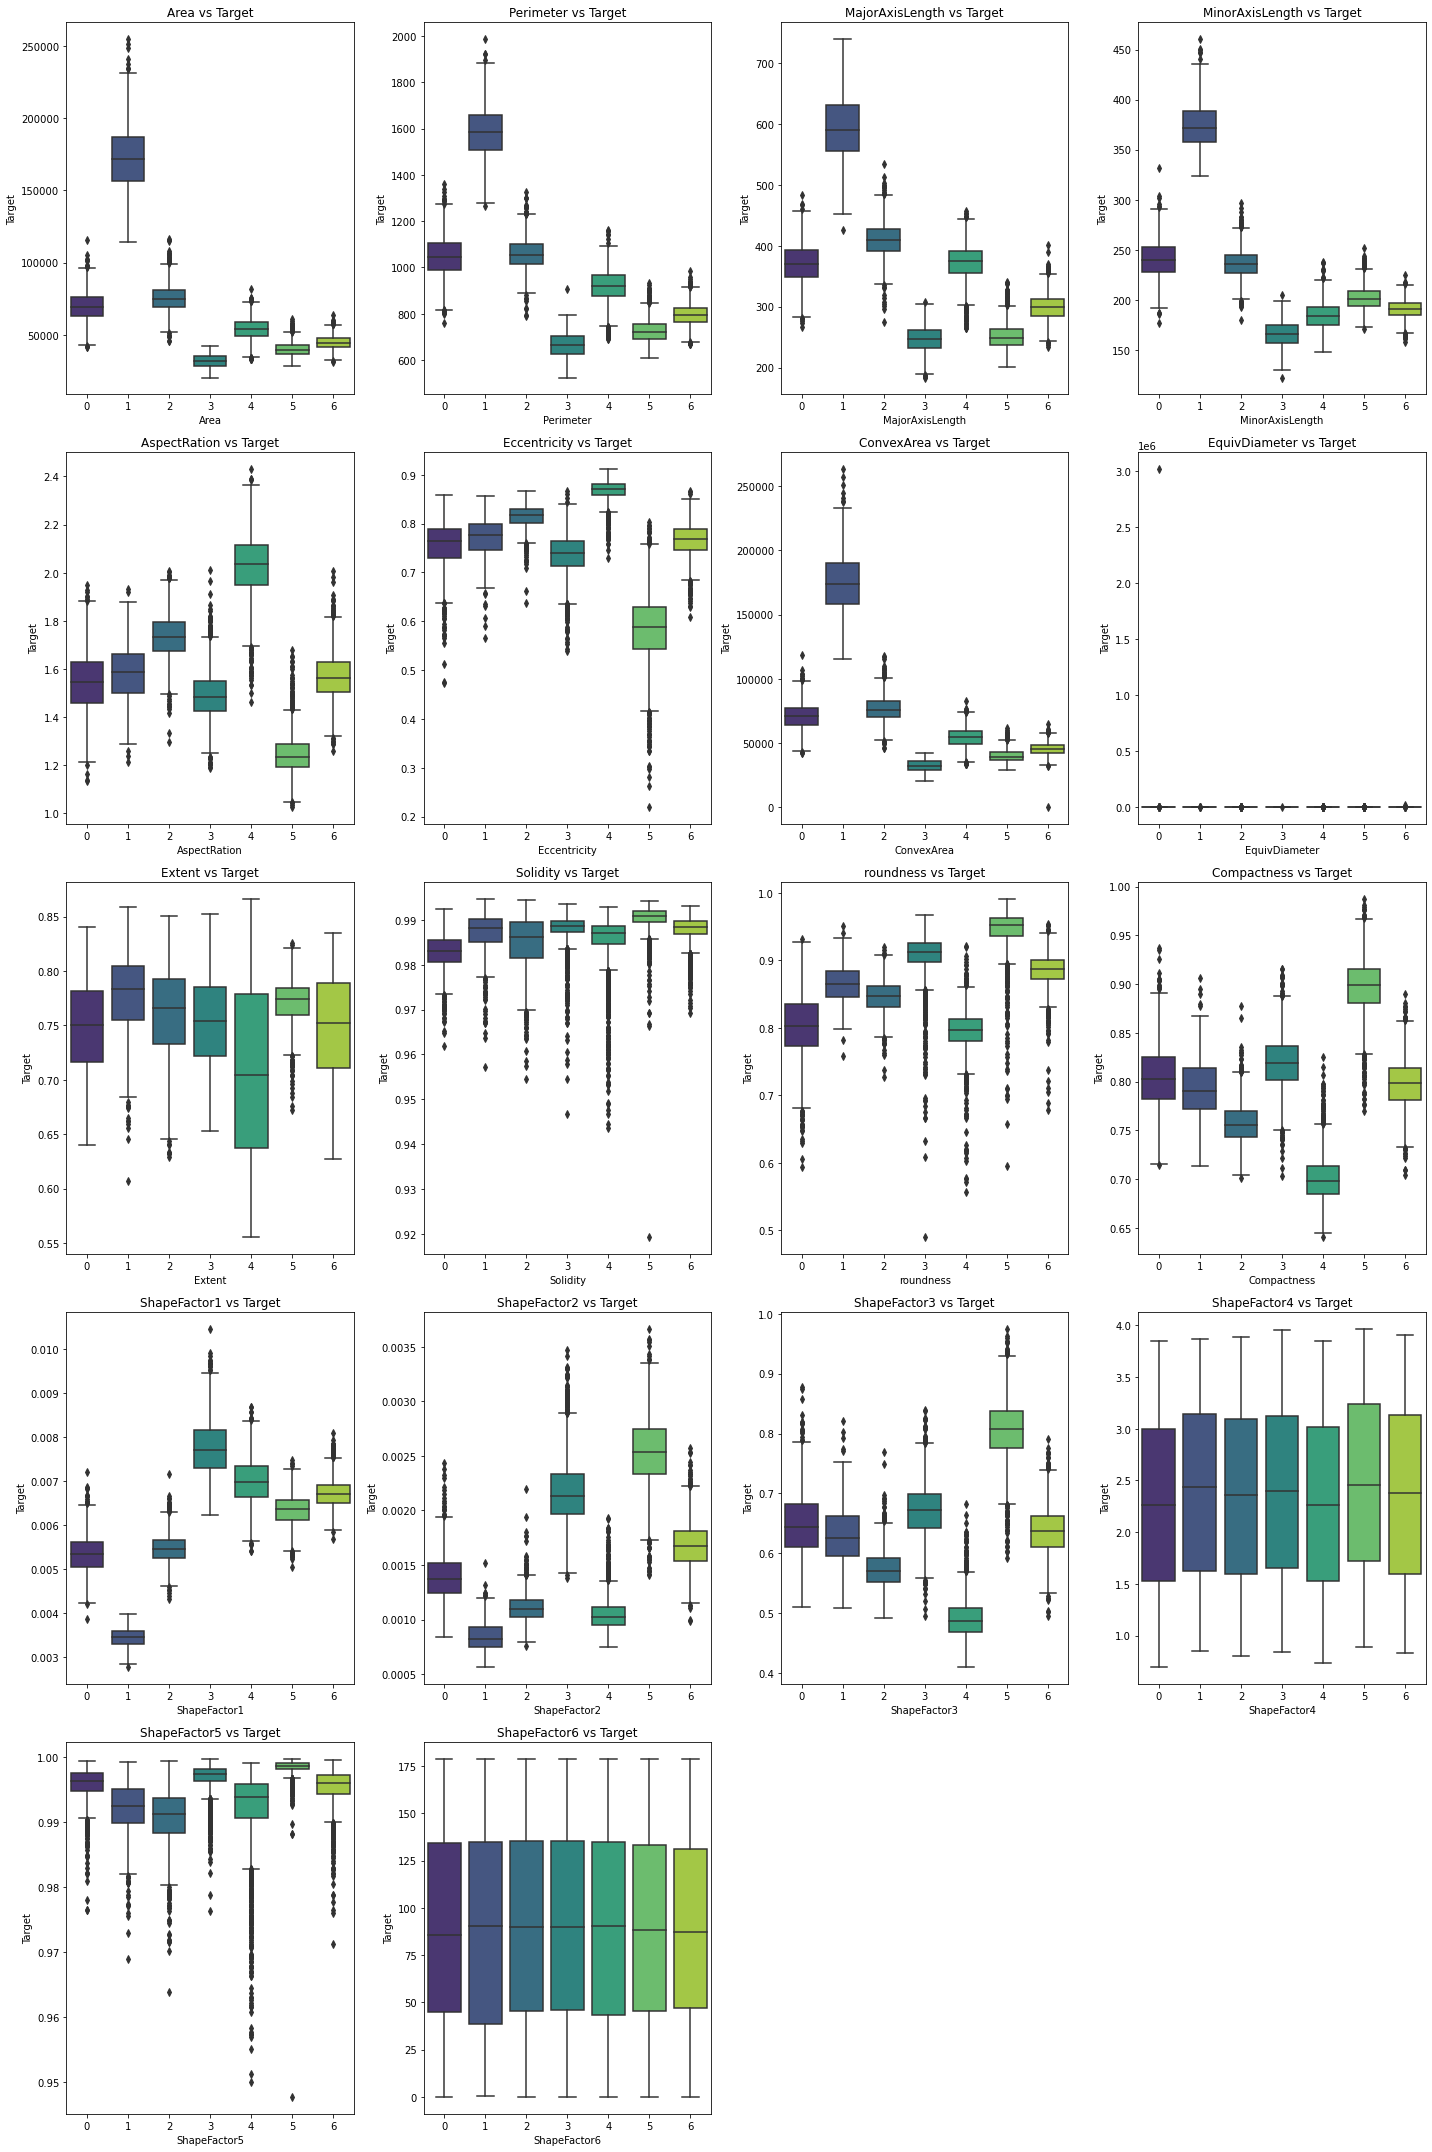

In [25]:
features = Beans_encoded.drop(["Class", "Sort order", 'Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white', "Constantness"], axis=1)
# Number of features
num_features = len(features)

# Set up the subplot grid
fig, axes = plt.subplots(5, 4, figsize=(20, 30))
axes = axes.flatten()
# Create scatter plots
for i, feature in enumerate(features):
    sns.boxplot(data=Beans_encoded, x='Class', y=feature, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

for i in range(len(axes)-2, len(axes)):
    fig.delaxes(axes[i])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("Plots/Continuous boxplots")
# plt.show()

In [26]:
Beans_encoded["EquivDiameter"].idxmin()

5846

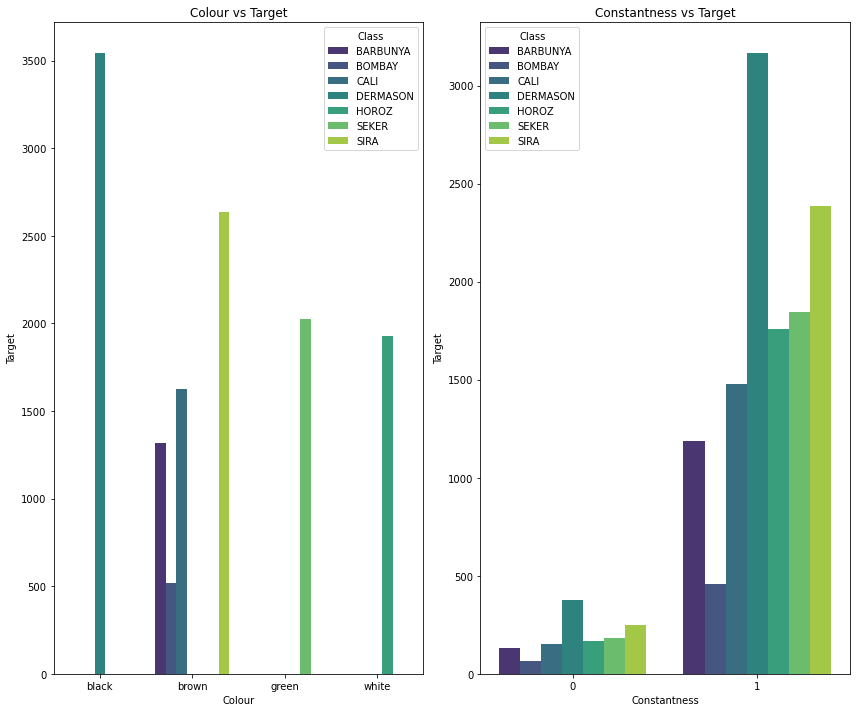

In [27]:
features = Beans[["Colour", "Constantness"]]
# Number of features
num_features = len(features)

# Set up the subplot grid
fig, axes = plt.subplots(1,2 , figsize=(12, 10))
axes = axes.flatten()
# Create scatter plots
for i, feature in enumerate(features):
    sns.countplot(data=Beans, x=feature, hue='Class', palette='viridis', ax=axes[i])
    axes[i].set_title(f'{feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("Plots/Discrete boxplots")
# plt.show()

In [28]:
X = Beans_encoded.drop(['Sort order', 'Class'], axis = 1)
y = Beans_encoded['Class']

In [29]:
smote = SMOTE(random_state=42)
tomek = TomekLinks()

# Create a pipeline with SMOTE and Tomek Links
pipeline = Pipeline(steps=[('tomek', tomek), ('smote', smote)])

X_resampled, y_resampled = pipeline.fit_resample(X,np.asarray(y))

In [30]:
X_num = X_resampled.drop(['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white',"Constantness"], axis=1)
X_cat = X_resampled[['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white', "Constantness"]]
X_standard = (X_num - X_num.mean())/X_num.std()
X_beans = pd.concat([X_standard, X_cat], axis=1)

In [31]:
y_beans = pd.DataFrame(y_resampled)
y_beans.value_counts()

0    3205
1    3205
2    3205
3    3205
4    3205
5    3205
6    3205
dtype: int64

In [32]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_beans, y_beans, test_size=0.3, random_state=42)

In [33]:
knn = KNeighborsClassifier(n_neighbors=151)  # n_neighbors is the number of neighbors to use

# Train the classifier
knn.fit(X_train, y_train)
# Make predictions
y_pred = knn.predict(np.asarray(X_test))

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [34]:
accuracy

0.976229386421037

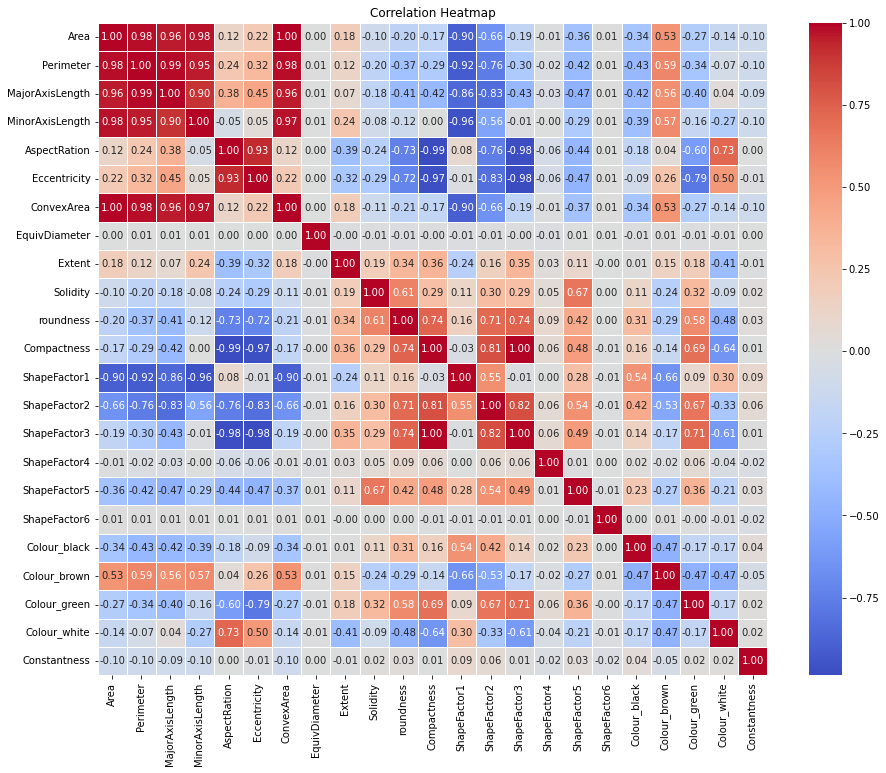

In [35]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap with annotation
sns.heatmap(X_beans.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Titles and labels
plt.title('Correlation Heatmap')
plt.show()

In [50]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Feature selection
# Apply LDA for dimensionality reduction
lda = LDA(n_components=4)  # Number of components should be less than number of classes
X_lda = lda.fit_transform(X_beans, y_beans)
print(lda.explained_variance_ratio_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_beans, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=133)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0.6420522  0.17917981 0.07496425 0.06993452]


0.9557272322091814

In [51]:
0.6452161 + 0.17630471 +0.07630772+0.06864158

0.9664701099999999

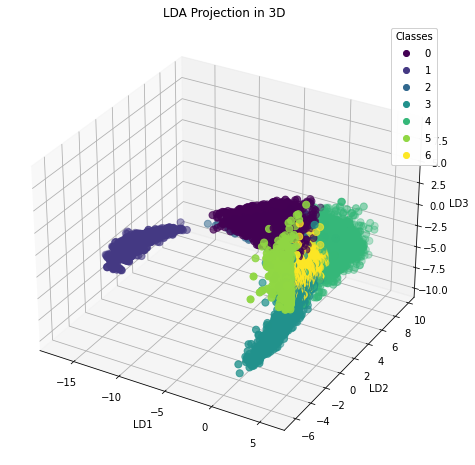

In [52]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of LDA components
scatter = ax.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c=y_beans, cmap='viridis', marker='o', s=50)

# Create a color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Labels and title
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')
ax.set_title('LDA Projection in 3D')

plt.savefig("Plots/LDA")

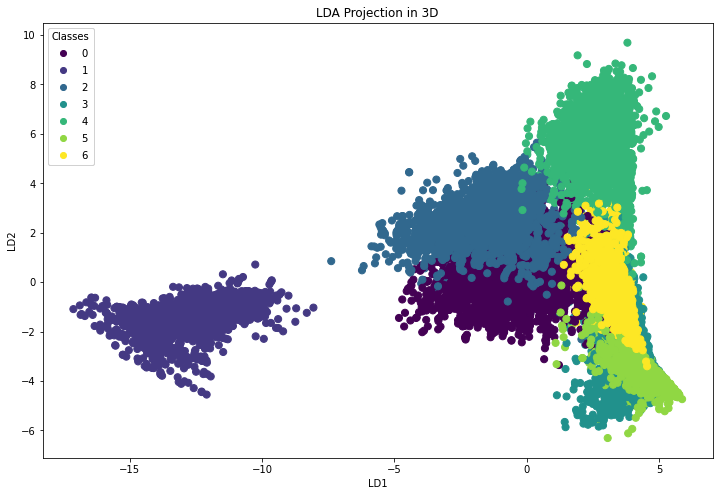

In [53]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Scatter plot of LDA components
scatter = ax.scatter(X_lda[:, 0], X_lda[:, 1], c=y_beans, cmap='viridis', marker='o', s=50)

# Create a color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Labels and title
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_title('LDA Projection in 3D')

plt.savefig("Plots/LDA_2D")
plt.show()

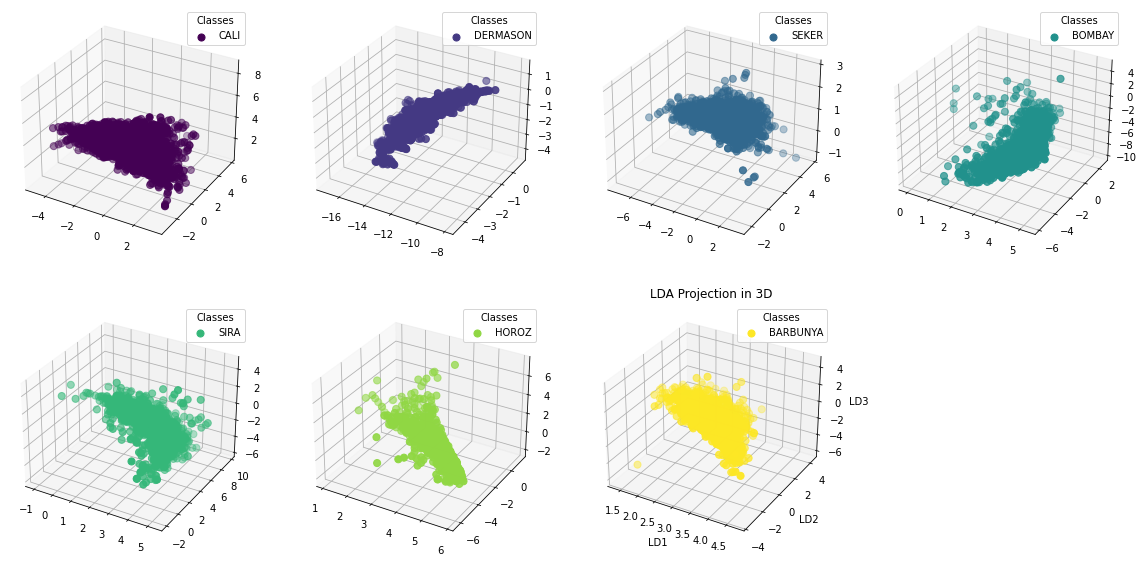

In [54]:
# Assuming X_lda and y_beans are already defined
y_please = np.asarray(y_beans)

# # Initialize the 3D plot
# fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Initialize the figure and subplots
fig, axes = plt.subplots(2, 4, subplot_kw={'projection': '3d'}, figsize=(20, 10))

# Define colors and markers for each class
colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(y_please))))
markers = ['o', 'o', 'o', 'o', 'o']  # Adjust markers if needed
axes = axes.flatten()
# Scatter plot each class
count = 0
for idx, class_label in enumerate(np.unique(y_please)):
    # Mask for the current class
    class_mask = (y_please == class_label)
    class_mask = class_mask.T[0]
    
    if idx == 0:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    if idx == 1:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
        
    if idx == 2:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')

    if idx == 3:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
        
    if idx == 4:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    if idx == 5:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    if idx == 6:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    count += 1
# Add a legend
    ax.legend(title="Classes")

# Labels and title
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')
ax.set_title('LDA Projection in 3D')
for i in range(7, len(axes)):
    fig.delaxes(axes[i])
# plt.show()
plt.savefig("Plots/LDA_Classes")

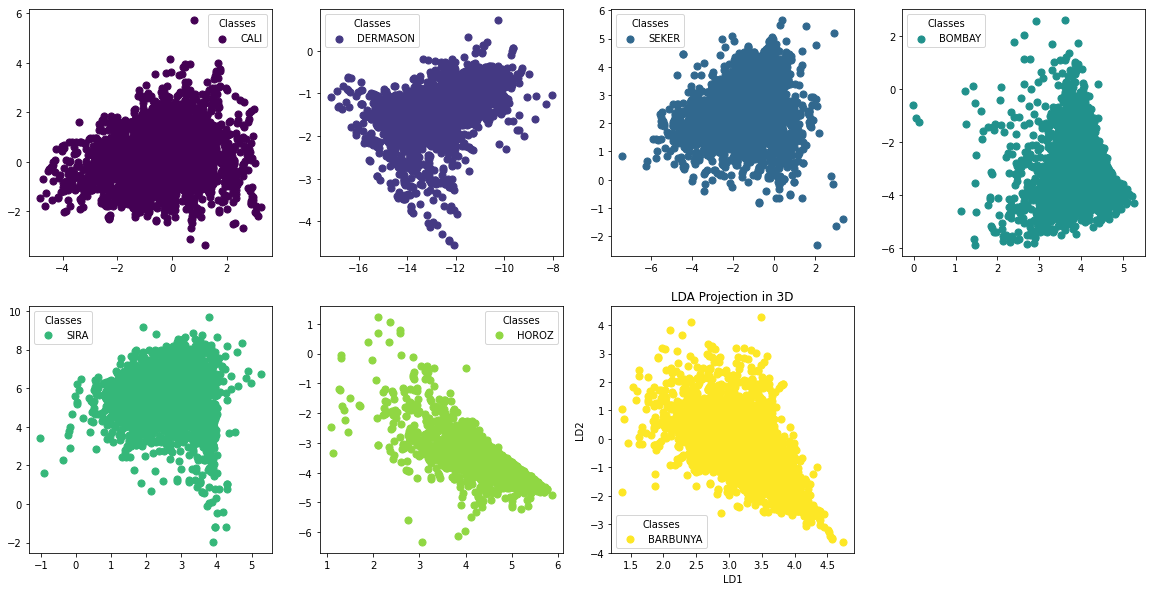

In [55]:
# Assuming X_lda and y_beans are already defined
y_please = np.asarray(y_beans)

# # Initialize the 3D plot
# fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Initialize the figure and subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Define colors and markers for each class
colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(y_please))))
markers = ['o', 'o', 'o', 'o', 'o']  # Adjust markers if needed
axes = axes.flatten()
# Scatter plot each class
count = 0
for idx, class_label in enumerate(np.unique(y_please)):
    # Mask for the current class
    class_mask = (y_please == class_label)
    class_mask = class_mask.T[0]
    
    if idx == 0:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    if idx == 1:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
        
    if idx == 2:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')

    if idx == 3:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
        
    if idx == 4:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    if idx == 5:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    if idx == 6:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    count += 1
# Add a legend
    ax.legend(title="Classes")

# Labels and title
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_title('LDA Projection in 3D')
for i in range(7, len(axes)):
    fig.delaxes(axes[i])
# plt.show()
plt.savefig("Plots/LDA_Classes_2D")

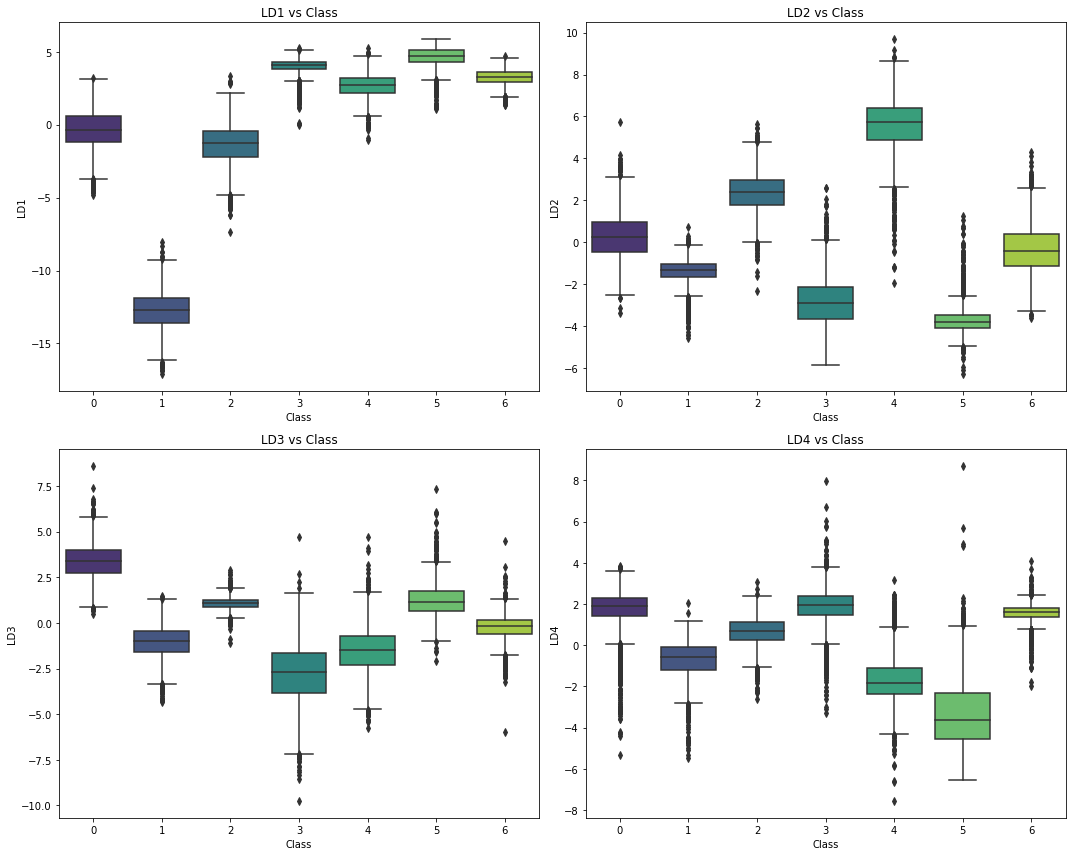

In [56]:
# Create DataFrame from LDA components
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2', 'LD3', 'LD4'])
# Concatenate with target feature
lda_df = pd.concat([lda_df, y_beans.reset_index(drop=True)], axis=1)
lda_df.columns = ['LD1', 'LD2', 'LD3', 'LD4', 'Class']

# Number of features for plotting
num_features = len(lda_df.columns) - 1  # Exclude 'Class'

# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Create boxplots for each feature
for i, feature in enumerate(['LD1', 'LD2', 'LD3', 'LD4']):
    sns.boxplot(data=lda_df, x='Class', y=feature, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{feature} vs Class')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(feature)

# Hide any extra subplots if there are fewer features than subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig("Plots/LDA_Continuous_Boxplots.png")

plt.show()

# Non resampled LDA graphs

In [57]:
X = Beans_encoded.drop(['Sort order', 'Class'], axis = 1)
y = Beans_encoded['Class']
X_num = X.drop(['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white',"Constantness"], axis=1)
X_cat = X[['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white', "Constantness"]]
X_standard = (X_num - X_num.mean())/X_num.std()
X_normal = pd.concat([X_standard, X_cat], axis=1)

# Feature selection
# Apply LDA for dimensionality reduction
lda = LDA(n_components=4)  # Number of components should be less than number of classes
X_lda = lda.fit_transform(X_normal, y)
print(lda.explained_variance_ratio_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=99, weights='distance')
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

[0.54243166 0.21914156 0.10116208 0.09195872]


0.9183874139626352

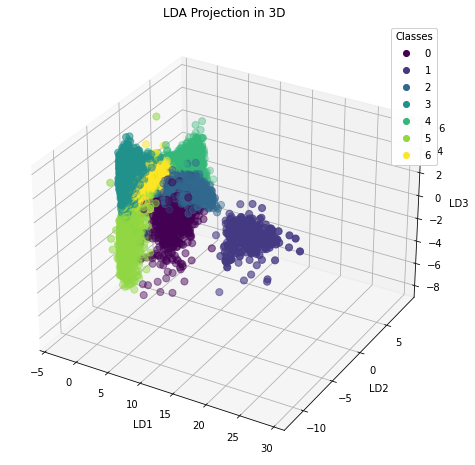

In [58]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of LDA components
scatter = ax.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c=y, cmap='viridis', marker='o', s=50)

# Create a color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Labels and title
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')
ax.set_title('LDA Projection in 3D')

plt.savefig("Plots/LDA_non_resampled")

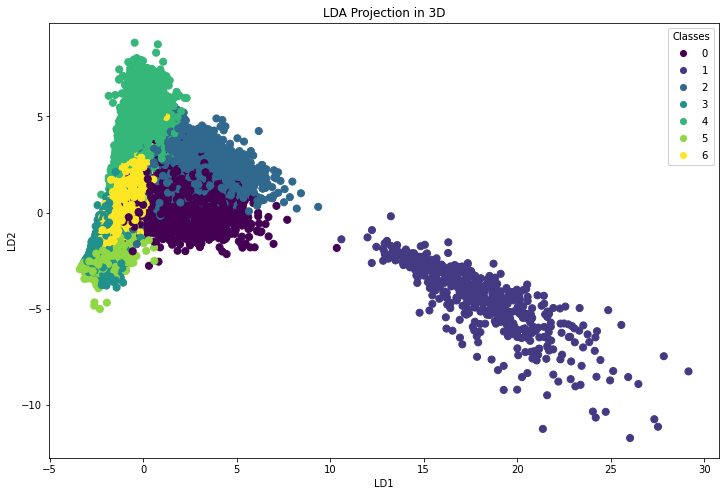

In [59]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Scatter plot of LDA components
scatter = ax.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', marker='o', s=50)

# Create a color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Labels and title
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_title('LDA Projection in 3D')

plt.savefig("Plots/LDA_2D_non_resampled")
plt.show()

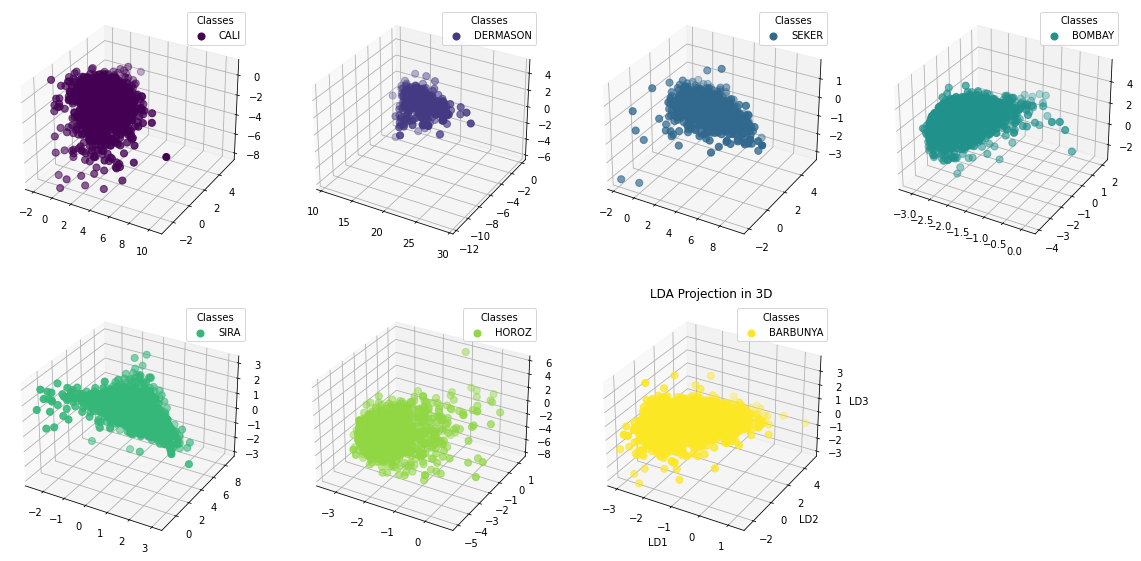

In [60]:
# Assuming X_lda and y_beans are already defined
y_please = np.asarray(y)

# # Initialize the 3D plot
# fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Initialize the figure and subplots
fig, axes = plt.subplots(2, 4, subplot_kw={'projection': '3d'}, figsize=(20, 10))

# Define colors and markers for each class
colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(y_please))))
markers = ['o', 'o', 'o', 'o', 'o']  # Adjust markers if needed
axes = axes.flatten()
# Scatter plot each class
count = 0
for idx, class_label in enumerate(np.unique(y_please)):
    # Mask for the current class
    class_mask = (y_please == class_label)
#     class_mask = class_mask.T[0]
    
    if idx == 0:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    if idx == 1:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
        
    if idx == 2:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')

    if idx == 3:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
        
    if idx == 4:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    if idx == 5:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    if idx == 6:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1], X_lda[class_mask, 2],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    count += 1
# Add a legend
    ax.legend(title="Classes")

# Labels and title
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')
ax.set_title('LDA Projection in 3D')
for i in range(7, len(axes)):
    fig.delaxes(axes[i])
# plt.show()
plt.savefig("Plots/LDA_Classes_non_resampled")

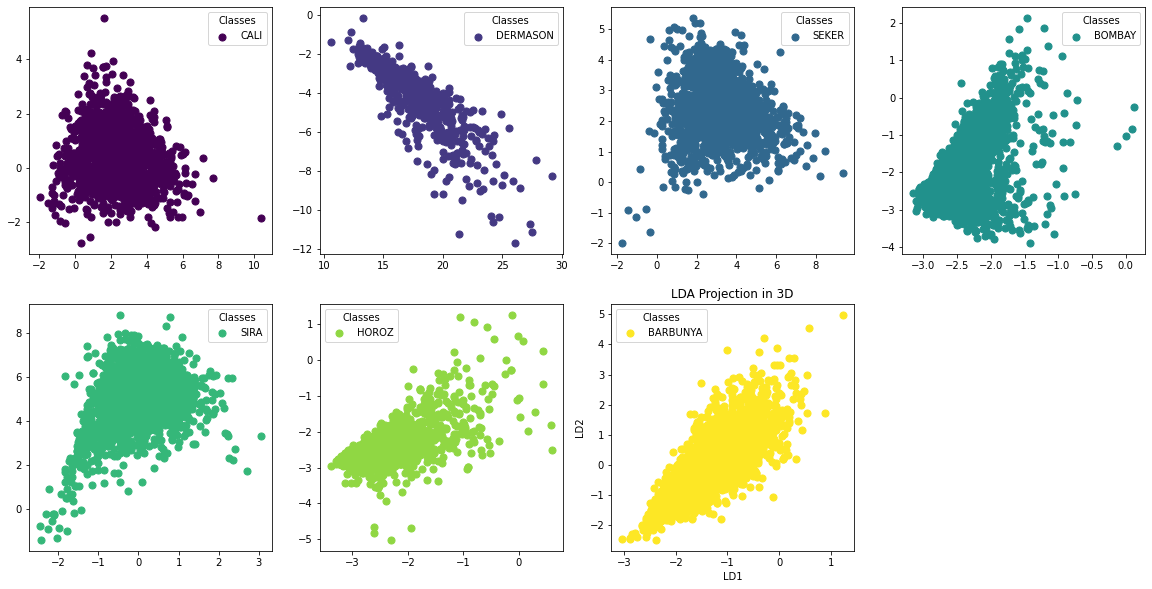

In [61]:
# Assuming X_lda and y_beans are already defined
y_please = np.asarray(y)

# # Initialize the 3D plot
# fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Initialize the figure and subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Define colors and markers for each class
colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(y_please))))
markers = ['o', 'o', 'o', 'o', 'o']  # Adjust markers if needed
axes = axes.flatten()
# Scatter plot each class
count = 0
for idx, class_label in enumerate(np.unique(y_please)):
    # Mask for the current class
    class_mask = (y_please == class_label)
#     class_mask = class_mask.T[0]
    
    if idx == 0:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    if idx == 1:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
        
    if idx == 2:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')

    if idx == 3:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
        
    if idx == 4:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    if idx == 5:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    if idx == 6:
        # Scatter plot for the current class
        ax = axes[idx]
        ax.scatter(X_lda[class_mask, 0], X_lda[class_mask, 1],
                   color=colors[idx], marker=markers[idx % len(markers)], s=50, label=f'{Beans["Class"].dropna().unique()[idx]}')
    
    count += 1
# Add a legend
    ax.legend(title="Classes")

# Labels and title
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_title('LDA Projection in 3D')
for i in range(7, len(axes)):
    fig.delaxes(axes[i])
# plt.show()
plt.savefig("Plots/LDA_Classes_2D_non_resampled")

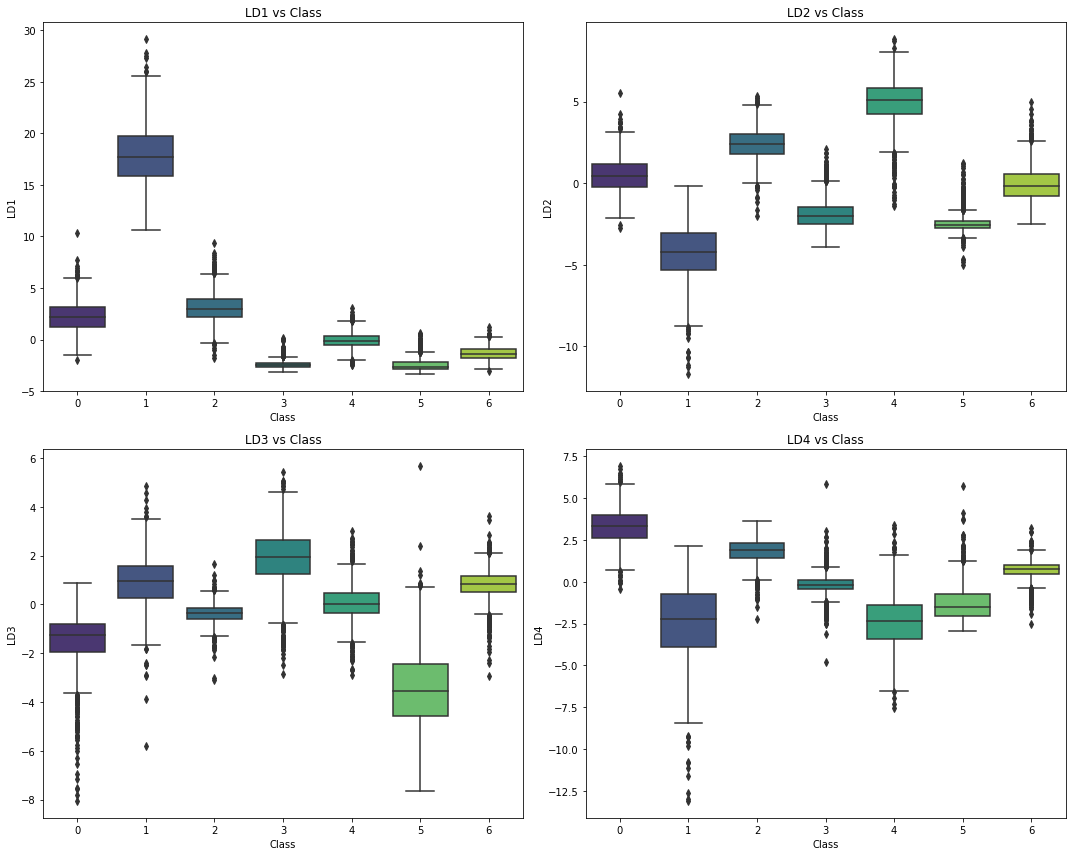

In [62]:
# Create DataFrame from LDA components
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2', 'LD3', 'LD4'])
# Concatenate with target feature
lda_df = pd.concat([lda_df, y.reset_index(drop=True)], axis=1)
lda_df.columns = ['LD1', 'LD2', 'LD3', 'LD4', 'Class']

# Number of features for plotting
num_features = len(lda_df.columns) - 1  # Exclude 'Class'

# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Create boxplots for each feature
for i, feature in enumerate(['LD1', 'LD2', 'LD3', 'LD4']):
    sns.boxplot(data=lda_df, x='Class', y=feature, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{feature} vs Class')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(feature)

# Hide any extra subplots if there are fewer features than subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig("Plots/LDA_Continuous_Boxplots_non_resampled.png")

plt.show()

# My KNN Model

## Euclidean distance resampled

In [99]:
# Feature selection
# Apply LDA for dimensionality reduction
lda = LDA(n_components=4)  # Number of components should be less than number of classes
X_lda_resampled = lda.fit_transform(X_beans, y_beans)
print(lda.explained_variance_ratio_)

# Split data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_lda_resampled, y_beans, test_size=0.3, random_state=42)

# Train KNN
knn_resampled = KNeighborsClassifier(n_neighbors=133)
knn_resampled.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_resampled = knn_resampled.predict(X_test_resampled)

accuracy_score(y_test_resampled, y_pred_resampled)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.6420522  0.17917981 0.07496425 0.06993452]


C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9557272322091814

In [100]:
from MyKNN import KNN

# missing_values = [np.nan, 0.0, -1.0, np.nan]
# X_test_resampled_mv = X_test_resampled.copy()
# X_test_resampled_mv[0] = missing_values

myknn = KNN(n_neighbors=133)
myknn.fit(X_train_resampled, y_train_resampled)

y_pred = myknn.predict(X_test_resampled)

accuracy_score(y_test_resampled, y_pred)

Computing Distances: 100%|█████████████████████████████████████████████████████████| 6731/6731 [14:12<00:00,  7.89it/s]


0.9554300995394444

## Euclidean distance without resampling

In [85]:
X = Beans_encoded.drop(['Sort order', 'Class'], axis = 1)
y = Beans_encoded['Class']
X_num = X.drop(['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white',"Constantness"], axis=1)
X_cat = X[['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white', "Constantness"]]
X_standard = (X_num - X_num.mean())/X_num.std()
X_normal = pd.concat([X_standard, X_cat], axis=1)

# Feature selection
# Apply LDA for dimensionality reduction
lda = LDA(n_components=4)  # Number of components should be less than number of classes
X_lda = lda.fit_transform(X_normal, y)
print(lda.explained_variance_ratio_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=99, weights='distance')
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)

accuracy_score(y_test, y_pred_knn)

[0.54243166 0.21914156 0.10116208 0.09195872]


0.9183874139626352

In [86]:
from MyKNN import KNN

# missing_values = [np.nan, 0.0, -1.0, np.nan]
# X_test_resampled_mv = X_test_resampled.copy()
# X_test_resampled_mv[0] = missing_values

myknn = KNN(n_neighbors=99, weights='distance')
myknn.fit(X_train, y_train)

y_pred = myknn.predict(X_test)

accuracy_score(y_test, y_pred)

Computing Distances: 100%|█████████████████████████████████████████████████████████| 4068/4068 [04:18<00:00, 15.71it/s]


0.9183874139626352

## Manhattan distance with resampling

In [108]:
# Feature selection
# Apply LDA for dimensionality reduction
lda = LDA(n_components=4)  # Number of components should be less than number of classes
X_lda_resampled = lda.fit_transform(X_beans, y_beans)
print(lda.explained_variance_ratio_)

# Split data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_lda_resampled, y_beans, test_size=0.3, random_state=42)

# Train KNN
knn_resampled = KNeighborsClassifier(n_neighbors=133, p=1)
knn_resampled.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_resampled = knn_resampled.predict(X_test_resampled)

accuracy_score(y_test_resampled, y_pred_resampled)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0.6420522  0.17917981 0.07496425 0.06993452]


0.9536473035210221

In [110]:
from MyKNN import KNN

# missing_values = [np.nan, 0.0, -1.0, np.nan]
# X_test_resampled_mv = X_test_resampled.copy()
# X_test_resampled_mv[0] = missing_values

myknn = KNN(n_neighbors=133, p=1)
myknn.fit(X_train_resampled, y_train_resampled)

y_pred = myknn.predict(X_test_resampled)

accuracy_score(y_test_resampled, y_pred)

Computing Distances: 100%|█████████████████████████████████████████████████████████| 6731/6731 [14:16<00:00,  7.86it/s]


0.9536473035210221

## Manhattan distance without resampling

In [111]:
X = Beans_encoded.drop(['Sort order', 'Class'], axis = 1)
y = Beans_encoded['Class']
X_num = X.drop(['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white',"Constantness"], axis=1)
X_cat = X[['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white', "Constantness"]]
X_standard = (X_num - X_num.mean())/X_num.std()
X_normal = pd.concat([X_standard, X_cat], axis=1)

# Feature selection
# Apply LDA for dimensionality reduction
lda = LDA(n_components=4)  # Number of components should be less than number of classes
X_lda = lda.fit_transform(X_normal, y)
print(lda.explained_variance_ratio_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=99, weights='distance', p=1)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)

accuracy_score(y_test, y_pred_knn)

[0.54243166 0.21914156 0.10116208 0.09195872]


0.9176499508357916

In [112]:
from MyKNN import KNN

# missing_values = [np.nan, 0.0, -1.0, np.nan]
# X_test_resampled_mv = X_test_resampled.copy()
# X_test_resampled_mv[0] = missing_values

myknn = KNN(n_neighbors=99, weights='distance', p=1)
myknn.fit(X_train, y_train)

y_pred = myknn.predict(X_test)

accuracy_score(y_test, y_pred)

Computing Distances: 100%|█████████████████████████████████████████████████████████| 4068/4068 [05:06<00:00, 13.29it/s]


0.9176499508357916

## Minkowski distance resampled

In [119]:
# Feature selection
# Apply LDA for dimensionality reduction
lda = LDA(n_components=4)  # Number of components should be less than number of classes
X_lda_resampled = lda.fit_transform(X_beans, y_beans)
print(lda.explained_variance_ratio_)

# Split data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_lda_resampled, y_beans, test_size=0.3, random_state=42)

# Train KNN
knn_resampled = KNeighborsClassifier(n_neighbors=133, p=5)
knn_resampled.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_resampled = knn_resampled.predict(X_test_resampled)

accuracy_score(y_test_resampled, y_pred_resampled)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0.6420522  0.17917981 0.07496425 0.06993452]


0.956172931213787

In [120]:
from MyKNN import KNN

# missing_values = [np.nan, 0.0, -1.0, np.nan]
# X_test_resampled_mv = X_test_resampled.copy()
# X_test_resampled_mv[0] = missing_values

myknn = KNN(n_neighbors=133, p=5)
myknn.fit(X_train_resampled, y_train_resampled)

y_pred = myknn.predict(X_test_resampled)

accuracy_score(y_test_resampled, y_pred)

Computing Distances: 100%|█████████████████████████████████████████████████████████| 6731/6731 [14:21<00:00,  7.81it/s]


0.9560243648789184

## Minkowski distance without resampling

In [122]:
X = Beans_encoded.drop(['Sort order', 'Class'], axis = 1)
y = Beans_encoded['Class']
X_num = X.drop(['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white',"Constantness"], axis=1)
X_cat = X[['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white', "Constantness"]]
X_standard = (X_num - X_num.mean())/X_num.std()
X_normal = pd.concat([X_standard, X_cat], axis=1)

# Feature selection
# Apply LDA for dimensionality reduction
lda = LDA(n_components=4)  # Number of components should be less than number of classes
X_lda = lda.fit_transform(X_normal, y)
print(lda.explained_variance_ratio_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=99, weights='distance', p=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)

accuracy_score(y_test, y_pred_knn)

[0.54243166 0.21914156 0.10116208 0.09195872]


0.9164208456243854

In [123]:
from MyKNN import KNN

# missing_values = [np.nan, 0.0, -1.0, np.nan]
# X_test_resampled_mv = X_test_resampled.copy()
# X_test_resampled_mv[0] = missing_values

myknn = KNN(n_neighbors=99, weights='distance', p=5)
myknn.fit(X_train, y_train)

y_pred = myknn.predict(X_test)

accuracy_score(y_test, y_pred)

Computing Distances: 100%|█████████████████████████████████████████████████████████| 4068/4068 [05:10<00:00, 13.12it/s]


0.9164208456243854

# Best subset selection

In [38]:
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

# Suppress the specific warning
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [133]:
X = Beans_encoded.drop(['Sort order', 'Class'], axis = 1)
y = Beans_encoded['Class']

smote = SMOTE(random_state=42)
tomek = TomekLinks()

# Create a pipeline with SMOTE and Tomek Links
pipeline = Pipeline(steps=[('tomek', tomek), ('smote', smote)])

X_resampled, y_resampled = pipeline.fit_resample(X,np.asarray(y))

In [135]:
X_num = X_resampled.drop(['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white',"Constantness"], axis=1)
X_cat = X_resampled[['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white', "Constantness"]]
X_standard = (X_num - X_num.mean())/X_num.std()
X_beans = pd.concat([X_standard, X_cat], axis=1)

(22435, 23)

In [118]:
X_beans

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Colour_black,Colour_brown,Colour_green,Colour_white,Constantness
0,0.300402,0.521352,0.647041,0.298802,0.681259,0.746287,0.321043,-0.011720,0.322425,-2.412825,...,-0.869721,-0.811552,1.413765,-2.391748,-0.802972,0.0,1.0,0.0,0.0,1
1,-0.666978,-0.804750,-0.812167,-0.629128,-0.590597,-0.328947,-0.669912,-0.014709,0.120512,0.677284,...,0.728081,0.499733,-1.390508,0.785078,1.213477,1.0,0.0,0.0,0.0,1
2,-0.750255,-0.969041,-1.106651,-0.544544,-1.491964,-1.861359,-0.753056,-0.015033,0.829103,0.722806,...,1.842245,1.753769,0.572337,0.994554,-0.157015,0.0,0.0,1.0,0.0,1
3,3.279060,2.820746,2.736234,2.838892,0.082723,0.332758,3.274608,-0.005810,0.192197,0.122103,...,-1.335527,-0.240744,0.898383,-0.305863,1.189512,0.0,1.0,0.0,0.0,1
4,-0.618484,-0.703174,-0.670778,-0.633802,-0.221482,0.066127,-0.623117,-0.014527,-0.653277,1.034547,...,0.366230,0.082325,-0.176663,0.464614,-1.379142,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23920,-0.424789,-0.418464,-0.339240,-0.439952,0.149864,0.385419,-0.428251,-0.013846,0.009427,0.612489,...,-0.101716,-0.270254,-0.632433,0.906587,0.523138,0.0,1.0,0.0,0.0,1
23921,-0.530644,-0.568505,-0.556131,-0.493109,-0.251521,0.037176,-0.531034,-0.014210,-0.806842,0.036349,...,0.249647,0.102616,1.826840,0.081125,1.093990,0.0,1.0,0.0,0.0,1
23922,-0.599737,-0.603251,-0.513470,-0.728515,0.420100,0.573562,-0.597023,-0.014458,0.614945,-0.667408,...,-0.057677,-0.550561,-0.989653,-0.779749,-0.888372,0.0,1.0,0.0,0.0,1
23923,-0.617494,-0.704969,-0.719689,-0.569640,-0.486647,-0.208550,-0.619125,-0.014523,0.923006,0.331331,...,0.543710,0.356160,0.180032,-0.003700,-0.256614,0.0,1.0,0.0,0.0,1


In [119]:
Beans_subset = X_beans.copy()
best_subset = []
n = X_beans.shape[1]-1

while n != 0:
    RSS = np.inf
    curr_subset = None
    for i in Beans_subset.columns:
        temp_subset = Beans_subset.drop(i, axis=1)

        X_train, X_test, y_train, y_test = train_test_split(temp_subset, y_resampled, test_size=0.3, random_state=0)

        knn_subset = KNeighborsClassifier(n_neighbors=129)
        knn_subset.fit(X_train, y_train)

        y_pred = knn_subset.predict(np.asarray(X_test))

        temp_rss = ((y_test-y_pred)**2).sum()
        if temp_rss < RSS:
            RSS = temp_rss
            curr_subset = temp_subset
    best_subset.append(curr_subset)
    Beans_subset = curr_subset
    n -= 1

In [120]:
best_subset

[           Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
 0      0.300402   0.521352         0.647041         0.298802      0.681259   
 1     -0.666978  -0.804750        -0.812167        -0.629128     -0.590597   
 2     -0.750255  -0.969041        -1.106651        -0.544544     -1.491964   
 3      3.279060   2.820746         2.736234         2.838892      0.082723   
 4     -0.618484  -0.703174        -0.670778        -0.633802     -0.221482   
 ...         ...        ...              ...              ...           ...   
 23920 -0.424789  -0.418464        -0.339240        -0.439952      0.149864   
 23921 -0.530644  -0.568505        -0.556131        -0.493109     -0.251521   
 23922 -0.599737  -0.603251        -0.513470        -0.728515      0.420100   
 23923 -0.617494  -0.704969        -0.719689        -0.569640     -0.486647   
 23924 -0.576770  -0.362482        -0.698989        -0.466348     -0.651151   
 
        Eccentricity  ConvexArea  EquivDiameter   

In [121]:
mean_scores = []
std_scores = []
for i in range(1, len(best_subset)):

    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    model = KNeighborsClassifier(n_neighbors=139)

    score = cross_val_score(model, np.asarray(X_beans[best_subset[i].columns]), y_resampled, cv=kf, scoring='accuracy')
    mean_score = score.mean()
    std_score = score.std()
    
    mean_scores.append(mean_score)
    std_scores.append(std_score)

In [122]:
std_scores

[0.0015772591234368414,
 0.0017435029144922986,
 0.0011643375780300267,
 0.0019034980207708434,
 0.0019034980207708434,
 0.0018859793810120616,
 0.0015208698347887331,
 0.0015672587886522505,
 0.0016582515715676106,
 0.00206885996585406,
 0.0020940397157576374,
 0.0020940397157576352,
 0.0015948826773950972,
 0.0015783663605850914,
 0.0017263846543835936,
 0.0020244733188401233,
 0.0020688599658540805,
 0.0025403672140476936,
 0.0042055627930968524,
 0.00513103148653676,
 0.004616660822230801]

In [123]:
mean_cv_errors = []
std_errors = []

for i in range(len(mean_scores)):
    std_error = std_scores[i] / np.sqrt(5)
    mean_cv_error = 1 - mean_scores[i]
    mean_cv_errors.append(mean_cv_error)
    std_errors.append(std_error)

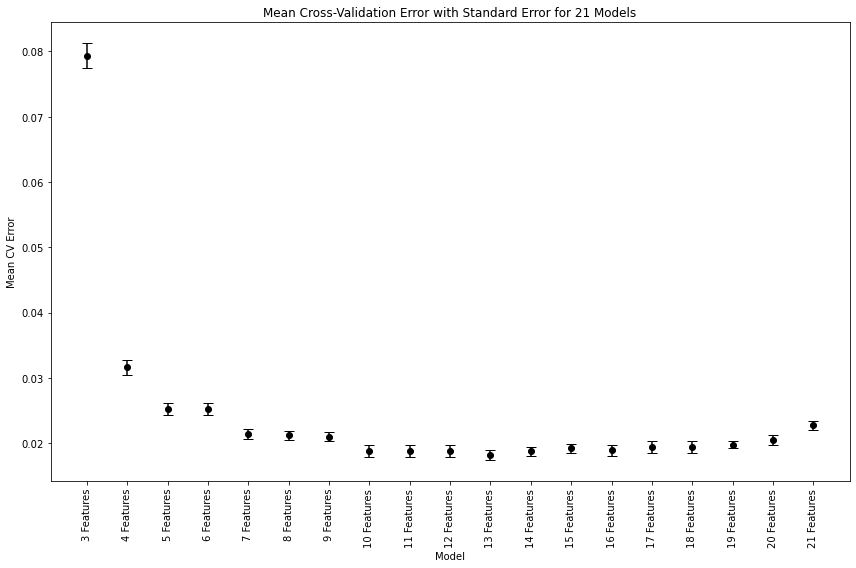

In [124]:
models = [f'{i+3} Features' for i in range(19)]
mean_cv_errors_reversed = mean_cv_errors[0:19][::-1]
std_errors_reversed = std_errors[0:19][::-1]

plt.figure(figsize=(12, 8))
plt.errorbar(models, mean_cv_errors_reversed, yerr=std_errors_reversed, fmt='o', ecolor='black', capsize=5, label='Mean CV Error',  markerfacecolor='black', markeredgecolor = 'black')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Mean CV Error')
plt.title('Mean Cross-Validation Error with Standard Error for 21 Models')
# plt.grid(True)
plt.tight_layout()
plt.show()

In [125]:
best_beans = best_subset[12]
best_beans

,Perimeter,MinorAxisLength,AspectRation,ConvexArea,roundness,ShapeFactor1,ShapeFactor5,Colour_brown,Colour_green,Colour_white
0,0.521352,0.298802,0.681259,0.321043,-0.555815,-0.571121,-2.391748,1.0,0.0,0.0
1,-0.804750,-0.629128,-0.590597,-0.669912,0.950264,0.619606,0.785078,0.0,0.0,0.0
2,-0.969041,-0.544544,-1.491964,-0.753056,1.504671,0.468455,0.994554,0.0,1.0,0.0
3,2.820746,2.838892,0.082723,3.274608,-0.239770,-2.123294,-0.305863,1.0,0.0,0.0
4,-0.703174,-0.633802,-0.221482,-0.623117,0.560820,0.634921,0.464614,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
23920,-0.418464,-0.439952,0.149864,-0.428251,0.327870,0.300554,0.906587,1.0,0.0,0.0
23921,-0.568505,-0.493109,-0.251521,-0.531034,0.425528,0.402315,0.081125,1.0,0.0,0.0
23922,-0.603251,-0.728515,0.420100,-0.597023,-0.260010,0.840374,-0.779749,1.0,0.0,0.0
23923,-0.704969,-0.569640,-0.486647,-0.619125,0.599862,0.532221,-0.003700,1.0,0.0,0.0


In [126]:
X_train, X_test, y_train, y_test = train_test_split(best_beans, y_resampled, test_size=0.3, random_state=0)

knn_subset = KNeighborsClassifier(n_neighbors=125)
knn_subset.fit(X_train, y_train)

y_pred = knn_subset.predict(np.asarray(X_test))

accuracy_score(y_test, y_pred)

0.980913903594316

In [ ]:
from MyKNN import KNN

# missing_values = [np.nan, 0.0, -1.0, np.nan]
# X_test_resampled_mv = X_test_resampled.copy()
# X_test_resampled_mv[0] = missing_values

myknn = KNN(n_neighbors=117)
myknn.fit(X_train, y_train)

y_pred = myknn.predict(np.asarray(X_test))

accuracy_score(y_test, y_pred)

Computing Distances:   1%|▍                                                          | 32/4068 [00:09<19:44,  3.41it/s]


In [129]:
# X = Beans_encoded.drop(['Sort order', 'Class'], axis = 1)
# y = Beans_encoded['Class']

smote = SMOTE(random_state=42)
tomek = TomekLinks()

# Create a pipeline with SMOTE and Tomek Links
pipeline = Pipeline(steps=[('tomek', tomek), ('smote', smote)])

X_resampled, y_resampled = pipeline.fit_resample(X,np.asarray(y))

Big_beans = Beans.dropna(subset=['Class']).copy()
label = LabelEncoder()
Big_beans['Class'] = label.fit_transform(Big_beans['Class'])

dropped_beans = Big_beans[Big_beans.isna().any(axis=1)]
dropped_beans = dropped_beans.dropna(subset=['Class'])
dropped_beans_encoded = pd.get_dummies(dropped_beans, columns=['Colour'], dtype=float)
dropped_beans_encoded.loc[dropped_beans['Colour'].isna(), dropped_beans_encoded.columns.str.startswith('Colour_')] = np.nan
dropped_beans_encoded

X_resampled = pd.concat([X_resampled, dropped_beans_encoded])
X_resampled = X_resampled.drop(['Class', 'Sort order'], axis=1)
X_num = X_resampled.drop(['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white',"Constantness"], axis=1)
X_cat = X_resampled[['Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white', "Constantness"]]
X_standard = (X_num - X_num.mean())/X_num.std()
X_beans = pd.concat([X_standard, X_cat], axis=1)
# dropped_beans_encoded = X_beans[X_beans.isna().any(axis=1)]

In [130]:
X_beans = X_beans[X_beans.isna().any(axis=1)]

X_missing = X_beans[best_beans.columns]
y_missing = dropped_beans_encoded['Class']

X_train, X_test, y_train, y_test = train_test_split(best_beans, y_resampled, test_size=0.3, random_state=0)

X_test = pd.concat([X_test, X_missing], axis=0)
y_test = pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_missing)], axis=0)

ValueError: Found input variables with inconsistent numbers of samples: [23925, 22435]

In [80]:
from MyKNN import KNN

# missing_values = [np.nan, 0.0, -1.0, np.nan]
# X_test_resampled_mv = X_test_resampled.copy()
# X_test_resampled_mv[0] = missing_values

myknn = KNN(n_neighbors=125)
myknn.fit(X_train, y_train)

y_pred = myknn.predict(np.asarray(X_missing))

accuracy_score(y_missing, y_pred)

Computing Distances: 100%|█████████████████████████████████████████████████████████████| 35/35 [00:13<00:00,  2.53it/s]


1.0

In [81]:
print(y_pred)
print(y_missing)

[6 2 4 3 5 5 4 2 5 3 4 3 3 4 1 3 3 4 3 2 1 2 6 5 5 4 5 5 2 5 4 4 4 1 4]
104      6
484      2
788      4
902      3
1175     5
1244     5
2042     4
2316     2
2317     5
2803     3
2831     4
2832     3
2881     3
3003     4
3149     1
3156     3
3417     3
3982     4
4239     3
4257     2
4258     1
5125     2
5846     6
5963     5
5999     5
6681     4
8813     5
9701     5
9702     2
9914     5
10015    4
10134    4
10234    4
10294    1
10325    4
Name: Class, dtype: int32


# Hyperparameter tuning of K

In [101]:
from sklearn.model_selection import GridSearchCV

k = 5

clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': list(range(235, 335, 2))
}, cv=k, return_train_score=True)

clf.fit(best_beans, y_resampled)


KeyboardInterrupt



In [ ]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=clf.param_grid['n_neighbors'], y=clf.cv_results_['mean_test_score'], marker='o', label='Mean Test Score', color='blue')
plt.fill_between(clf.param_grid['n_neighbors'], 
                 [m - s for m, s in zip(clf.cv_results_['mean_test_score'], clf.cv_results_['std_test_score']/np.sqrt(k))], 
                 [m + s for m, s in zip(clf.cv_results_['mean_test_score'], clf.cv_results_['std_test_score']/np.sqrt(k))], 
                 color='blue', alpha=0.2, label='Standard Deviation')

plt.title('Mean Test Scores vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=90)
plt.xticks(clf.param_grid['n_neighbors'])
# plt.grid(True)
plt.legend()
plt.show()

In [ ]:
models = [f'{i*2+93} Features' for i in range(len(clf.cv_results_['mean_test_score']))]
mean_cv_errors_reversed = 1 - clf.cv_results_['mean_test_score']
std_errors_reversed = clf.cv_results_['std_test_score']/np.sqrt(k)

plt.figure(figsize=(18, 10))
plt.errorbar(models, mean_cv_errors_reversed, yerr=std_errors_reversed, fmt='o', ecolor='black', capsize=5, label='Mean CV Error',  markerfacecolor='black', markeredgecolor = 'black')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Mean CV Error')
plt.title('Mean Cross-Validation Error with Standard Error for 21 Models')
# plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
models = [f'{i*2+93} Features' for i in range(len(clf.cv_results_['mean_test_score']))]
mean_cv_errors_reversed = 1 - clf.cv_results_['mean_test_score']
std_errors_reversed = clf.cv_results_['std_test_score']/np.sqrt(k)

plt.figure(figsize=(12, 8))
plt.errorbar(clf.param_grid['n_neighbors'], clf.cv_results_['mean_test_score'], yerr=clf.cv_results_['std_test_score']/np.sqrt(k), fmt='o', ecolor='black', capsize=5, label='Mean CV Error',  markerfacecolor='black', markeredgecolor = 'black')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Mean CV score')
plt.title('Mean Cross-Validation Error with Standard Error for 21 Models')
# plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
clf.cv_results_

In [113]:
X_train, X_test, y_train, y_test = train_test_split(best_beans, y_resampled, test_size=0.3, random_state=0)

knn_subset = KNeighborsClassifier(n_neighbors=500)
knn_subset.fit(X_train, y_train)

y_pred = knn_subset.predict(np.asarray(X_test))

accuracy_score(y_test, y_pred)

0.9723666617144555

In [114]:
y_pred = knn_subset.predict(np.asarray(X_train))

accuracy_score(y_train, y_pred)

0.9741467142129394